In [28]:
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt

sp.init_printing(use_unicode=True)

#### **Exercise 1:**
Create a function returning the first N terms of the Taylor series of the function without using the sympy series function.
Use the definition using derivative

In [15]:
def taylor(expr,x_0,n):
    t = 0
    
    for i in range(n):
        f = (sp.diff(expr,x,i).subs(x,x_0)) /(math.factorial(i)) * (x - x_0)**i
        t += f
    return t

x_0, x = sp.symbols('x_0 x')
expr=sp.sin(x - x_0)
print(taylor(expr,x_0,5).subs(x_0,0))

-x**3/6 + x


In [13]:
# check

sp.sin(x).series(x, n=5)

#### **Exercise 2:**

Write a matrix multiplication function using lists ("manually", using the matrix multiplication formula) and another one using numpy arrays (call matmul function). Time them both. 

In [16]:
# using lists
def mat_multiply(A,B):

    n = len(A)
    m = len(B[0])
    q = len(A[0])

    AB = [ [ 0 for i in range(m)] for i in range(n)]
    for i in range(n):
        for j in range(m):
            for k in range(q):
                AB[i][j] += A[i][k] * B[k][j]
    return AB
    
A = [[1,2,3],[4,5,6]]
B = [[4,5],[6,7],[8,9]]


print(mat_multiply(A,B))

[[40, 46], [94, 109]]


In [22]:
%%timeit
mat_multiply(A,B)

895 ns ± 11.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [20]:
# using matmul
def matAB(A,B):
    mat = np.matmul(A, B)

    return mat
A = [[1,2,3],[4,5,6]]
B = [[4,5],[6,7],[8,9]]

print(matAB(A,B))

[[ 40  46]
 [ 94 109]]


In [23]:
%%timeit
matAB(A,B)

1.66 μs ± 22.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


#### **Execrise 3:**

Consider the following example. Change functions in it to plot something different from `sin` in each panel. Add x and y labels to each panel. Experiment till this looks nice enough for an article. Save the output. 

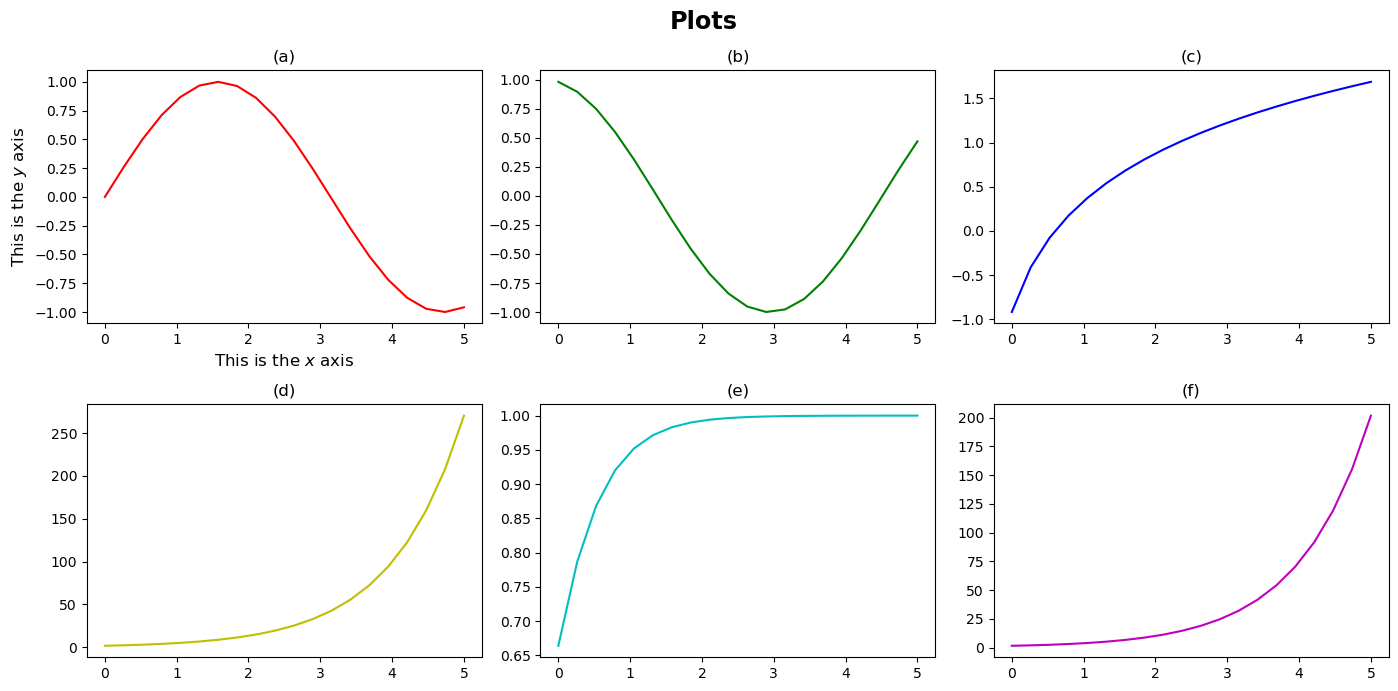

In [90]:
x = np.linspace(0,5,20)
y1 = np.sin(x)
y2 = np.cos(x + 0.2)
y3 = np.log(x + 0.4)
y4 = np.exp(x + 0.6)
y5 = np.tanh(x + 0.8)
y6 = np.cosh(x + 1)

# now we decide the actual figure size in inches
fig = plt.figure(figsize=(14,7))

plt.suptitle('Plots',fontweight='bold', fontsize='xx-large')
plt.subplots_adjust(hspace=0.3, top=0.8) 
# create subplots 231 means make a 2x3 grid and this is the first plot
plt.subplot(231)
#these are here to show that you can do the same here as for a single plot
plt.title('(a)',fontsize = 'large',fontweight='medium')
plt.ylabel('This is the $y$ axis',fontsize = 'large',fontstyle='normal',fontweight = 'medium')
plt.xlabel('This is the $x$ axis',fontsize = 'large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y1,color='r')

plt.subplot(232)
plt.title('(b)',fontsize = 'large',fontweight='medium')
plt.plot(x,y2,color='g')
plt.subplot(233)
plt.title('(c)',fontsize = 'large',fontweight='medium')
plt.plot(x,y3,color='b')
plt.subplot(234)
plt.title('(d)',fontsize = 'large',fontweight='medium')
plt.plot(x,y4,color='y')
plt.subplot(235)
plt.title('(e)',fontsize = 'large',fontweight='medium')
plt.plot(x,y5,color='c')
plt.subplot(236)
plt.title('(f)',fontsize = 'large',fontweight='medium')
plt.plot(x,y6,color='m')
# removed extra white space
plt.tight_layout()
plt.show()

#### **Exercise 4:**
Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

In [24]:
def recaman(max_terms):
    exist = set()
    seq=list()
    n = 0 
    a = 0
    while n < max_terms:
        diff=a-n
        if diff > 0 and diff not in exist:
            a = diff
        else:
            a = a + n
        exist.add(a)
        seq.append(a)
        n += 1
    return seq

In [50]:
print(recaman(70))

[0, 1, 3, 6, 2, 7, 13, 20, 12, 21, 11, 22, 10, 23, 9, 24, 8, 25, 43, 62, 42, 63, 41, 18, 42, 17, 43, 16, 44, 15, 45, 14, 46, 79, 113, 78, 114, 77, 39, 78, 38, 79, 37, 80, 36, 81, 35, 82, 34, 83, 33, 84, 32, 85, 31, 86, 30, 87, 29, 88, 28, 89, 27, 90, 26, 91, 157, 224, 156, 225]


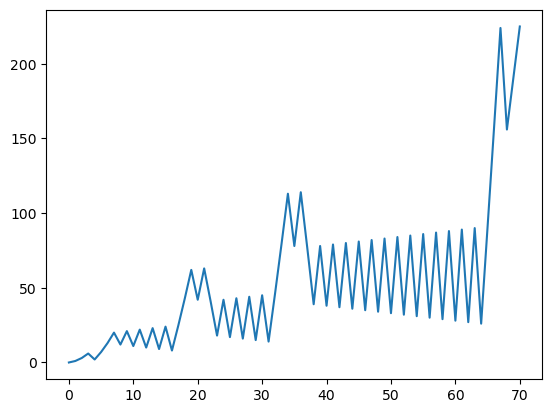

In [52]:
x = np.linspace(0,70,70, dtype=int)
ls = recaman(70)
y = np.array(ls)

plt.plot(x,y)
plt.show()

In [156]:
ls = recaman(30)
y = np.array(ls)
z = np.zeros(30)
#plt.plot(y,z,linestyle='-',linewidth=1,color='r',marker=('o'))
#plt.show()

from arcplot import arcdiagram

Title = "Recaman Sequence"
arc_diagram = ArcDiagram(nodes, title)

for i in range(1,30):
    if i%2 == 0:
        arc_diagram.connect(y[i-1], y[i])
    else:
        arc_diagram.connect(y[i-1], y[i], arc_position="below")
arc_diagram.show_plot()

ModuleNotFoundError: No module named 'arcplot'

#### **Exercise 5:**

Plot a rainbow. Use your imagination and google to make it beautiful.

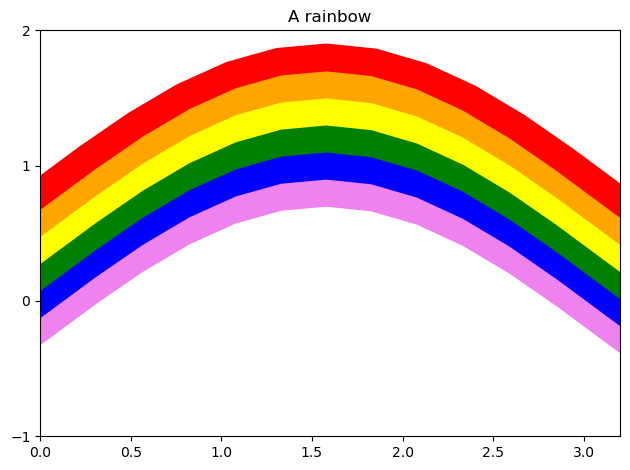

In [88]:
x = np.linspace(0,5,20)
y1 = np.sin(x)
y2 = np.sin(x) + 0.2
y3 = np.sin(x) + 0.4
y4 = np.sin(x) + 0.6
y5 = np.sin(x) + 0.8
y6 = np.sin(x) - 0.2

#aspect ratio
#w, h = plt.figaspect(0.56)
#plt.figure('Sin plots',figsize=(w,h))

plt.plot(x,y6,linestyle='-',linewidth=20,color='violet')
plt.plot(x,y1,linestyle='-',linewidth=20,color='blue')
plt.plot(x,y2,linestyle='-',linewidth=20,color='green')
plt.plot(x,y3,linestyle='-',linewidth=20,color='yellow')
plt.plot(x,y4,linestyle='-',linewidth=20,color='orange',)
plt.plot(x,y5,linestyle='-',linewidth=20,color='red')

# Tick location and limits
#plt.xticks((0,1,2,3,4,5))
plt.xlim(0,5)
plt.yticks((-1,0,1,2))
plt.ylim(-1,2)

# Make ticks point inwards and also appear top and right
#plt.tick_params(direction='in',top=True,right=True)

#Add some labels
plt.title('A rainbow',fontsize = 'large',fontweight='medium')
plt.xlim(0,3.2)

# add a legend
# you can also label the lines in the plot diective with: label='name here'
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(weight='bold',style='normal', size=16)

# removed extra white space
plt.tight_layout()

#### **Exercise 6:**

Plot a nice-looking 3-D torus. Do this 3 times with different styles. 

Text(0.5, 0.92, '3D Torus')

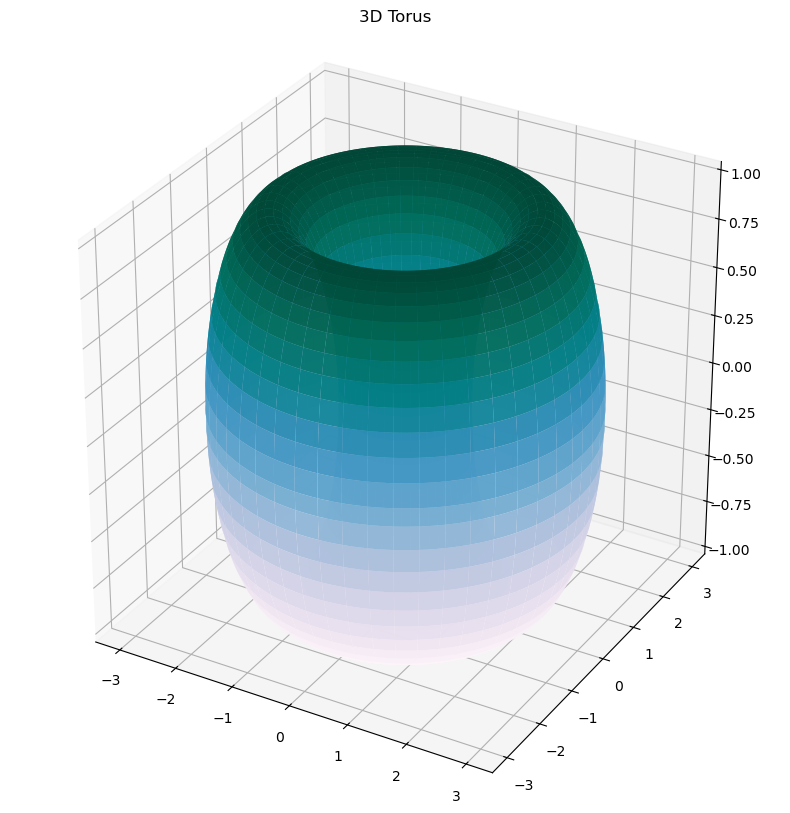

In [122]:
from mpl_toolkits.mplot3d import Axes3D
R = 2
r = 1
u = np.linspace(0,2 * np.pi, 200)
v = np.linspace(0,2 * np.pi, 200)
u, v = np.meshgrid(u,v)

x = (R + r* np.cos(v)) * np.cos(u)
y = (R + r* np.cos(v)) * np.sin(u)
z = r * np.sin(v)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface( x, y, z, rstride=4, cstride=4, cmap='PuBuGn', alpha = 0.95)

ax.set_box_aspect([1,1,1])
ax.set_title("3D Torus")
#ax.plot_wireframe(x, y, z)

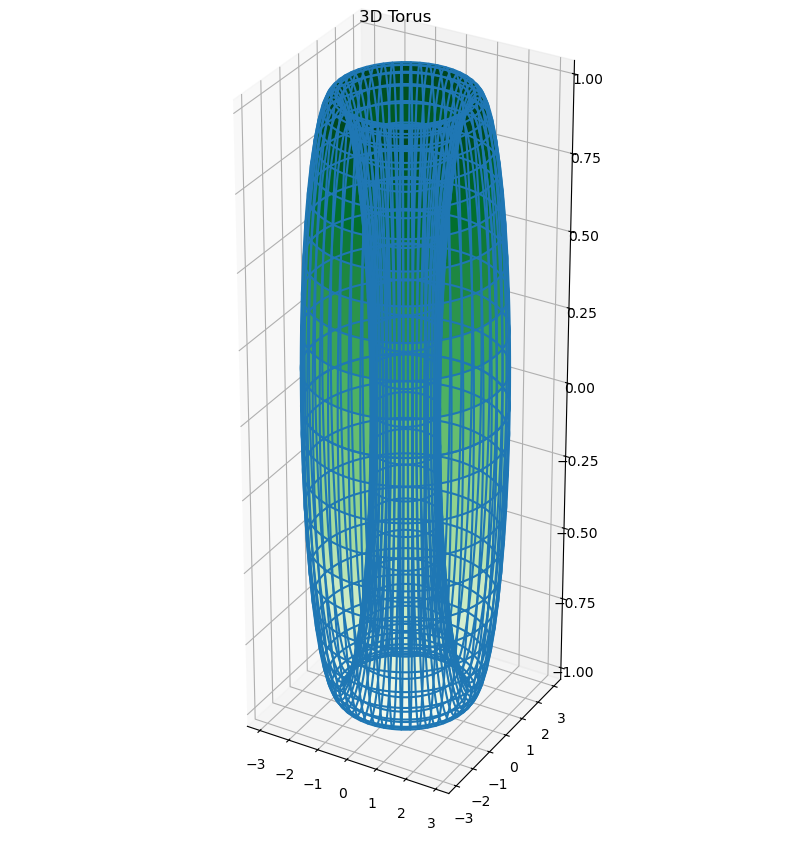

In [139]:
R = 2
r = 1
u = np.linspace(0,2 * np.pi, 200)
v = np.linspace(0,2 * np.pi, 200)
u, v = np.meshgrid(u,v)

x = (R + r* np.cos(v)) * np.cos(u)
y = (R + r* np.cos(v)) * np.sin(u)
z = r * np.sin(v)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface( x, y, z, rstride=4, cstride=4, cmap='Greens', alpha = 1.0)

ax.set_box_aspect([1,1,1+R/r])
ax.set_title("3D Torus")
ax.plot_wireframe(x, y, z)

Text(0.5, 0.92, '3D Torus')

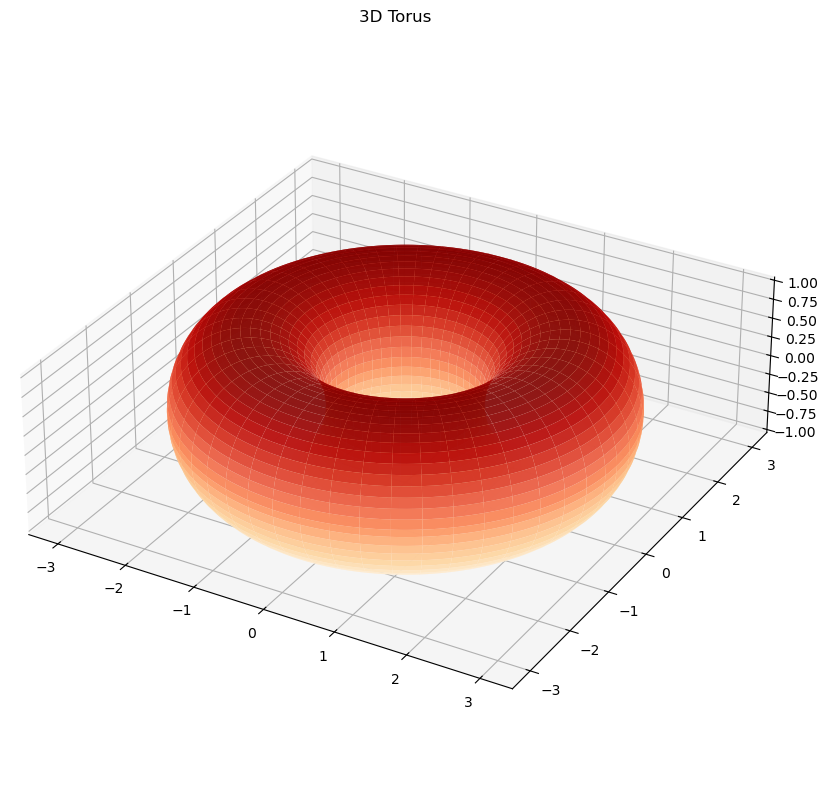

In [140]:
R = 2
r = 1
u = np.linspace(0,2 * np.pi, 200)
v = np.linspace(0,2 * np.pi, 200)
u, v = np.meshgrid(u,v)

x = (R + r* np.cos(v)) * np.cos(u)
y = (R + r* np.cos(v)) * np.sin(u)
z = r * np.sin(v)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface( x, y, z, rstride=4, cstride=4, cmap='OrRd', alpha = 0.9)

ax.set_box_aspect([1+R/r, 1+R/r, 1])
ax.set_title("3D Torus")
#ax.plot_wireframe(x, y, z)

#### **Exercise 7:**

Repeat the curve fitting example (from SciPy lecture) with the following modifications:

 - choose some other function
 - first write the data to a file, then read it (with numpy, for example)
 - produce the picture that has axes, name and legend


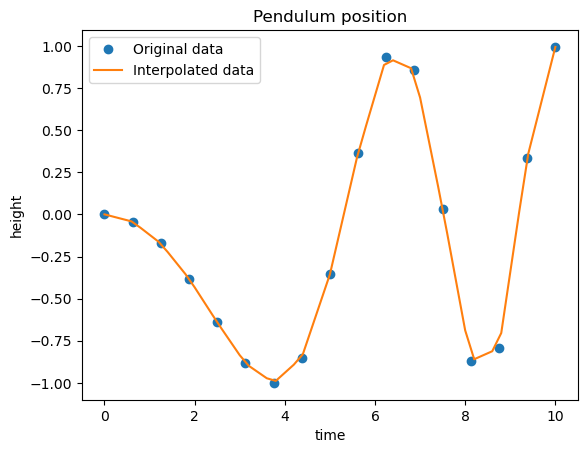

In [153]:
from scipy.interpolate import interp1d

# generate data
x = np.linspace(0, 10, 17)
y = np.sin(-x**2/9.0)

# interpolate
f = interp1d(x, y, kind='linear')
x_interp = np.linspace(0, 10, num=51)
y_interp = f(x_interp)

# plot original and interpolated data
plt.plot(x, y, 'o', label='Original data')
plt.plot(x_interp, y_interp, label='Interpolated data')
plt.title('Pendulum position')
plt.xlabel('time')
plt.ylabel('height')
plt.legend()

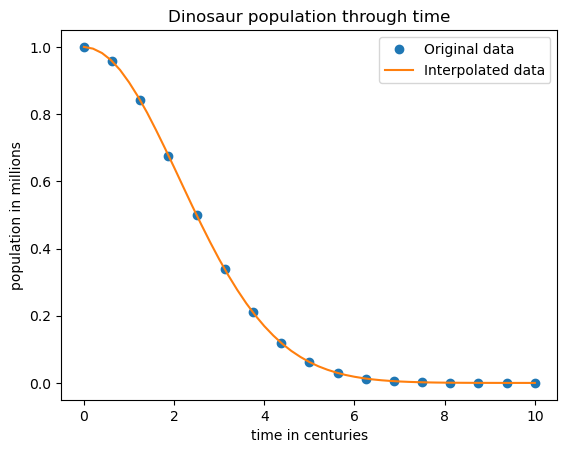

In [155]:
# generate data
x = np.linspace(0, 10, 17)
y = np.exp(-x**2/9.0)

# interpolate
f = interp1d(x, y, kind='quadratic')
x_interp = np.linspace(0, 10, num=51)
y_interp = f(x_interp)

# plot original and interpolated data
plt.plot(x, y, 'o', label='Original data')
plt.plot(x_interp, y_interp, label='Interpolated data')
plt.title('Dinosaur population through time')
plt.xlabel('time in centuries')
plt.ylabel('population in millions')
plt.legend()

#### **Exercise 8:**

Integrate the function `x**2 + 10*np.sin(x)` on the interval `[-10,10]`.
Find a way to make a plot like in textbooks where you color the area under the curve that you integrate.
Now integrate the same function symbolically using `sympy`, then put borders into it and compare the results.

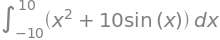

In [168]:
import sympy as sp

x = sp.symbols('x')
sp.Integral(x**2 + 10*sp.sin(x),(x, -10, 10))

In [169]:
sp.integrate(x**2 + 10*sp.sin(x),x)

In [183]:
from scipy.integrate import quad
def integrand(x):
    return x**2 + 10*np.sin(x)

res = quad(integrand, -10, 10)
print(res)

(666.6666666666667, 7.655722985888797e-12)


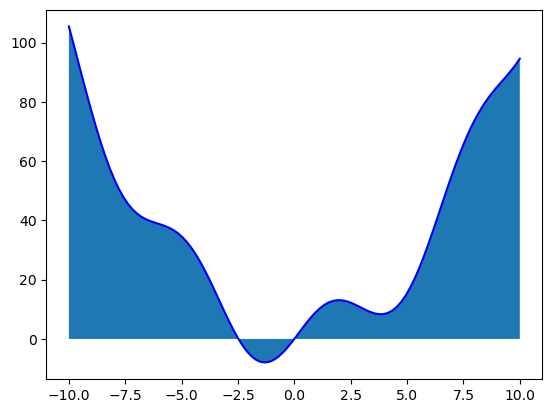

In [182]:
import numpy as np
import matplotlib.pyplot as plt


def func(x):
    return x**2 + 10*np.sin(x)


x = np.linspace(-10, 10, 100)
y=func(x)
t=-10
plt.fill_between(x,y)
plt.plot(x, y, 'b-')